In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image

## Load Data

In [2]:
image_size = 32
data_dir = '/kaggle/input/vaporarray/test.out.npy'
x_train = np.load(data_dir)
#  array contains many images stacked together, 909 images of 128, 128, 3
print(f'shape: ', x_train.shape)
print(f'data size: ', x_train.size)
print(f'type: ', type(x_train))
print(f'image data type: ', type(x_train[0][0][0][0]))

shape:  (909, 128, 128, 3)
data size:  44679168
type:  <class 'numpy.ndarray'>
image data type:  <class 'numpy.float64'>


## Conversion

In [3]:
# we need numpy.uint8 images
data = x_train.astype(np.float64)
data = data * 255
x_train = data.astype(np.uint8)
print('new data type of images: ', type(x_train[0][0][0][0]))

new data type of images:  <class 'numpy.uint8'>


## Visualization

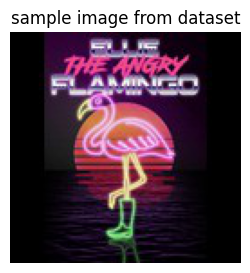

In [4]:
# display a random sample
sample_image = np.random.randint(0, len(x_train)) # any number (for image) within len of data set
# plot the image with its number
plt.figure(figsize=(3,3))
plt.imshow(x_train[sample_image])
plt.title('sample image from dataset')
plt.axis('off')
plt.show()

## Custom dataset class

In [5]:
class vaporarray_data(Dataset):
    def __init__(self, x):
        self.x = x
    # def __init__(self, x, y):
    #     self.x = x
    #     self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, ix):
        image = self.x[ix]
        x = self.transform(image)
        return x
    transform = T.Compose([
        T.ToPILImage(),
        T.Resize(image_size),
        T.ToTensor()])
    
# load data using class
batch_size = 32
transformed_dataset = vaporarray_data(x_train) # transformations apply on data
train_dl = DataLoader(transformed_dataset, batch_size, shuffle=True, num_workers=3, pin_memory=True) # load data

## Dataset Visualization

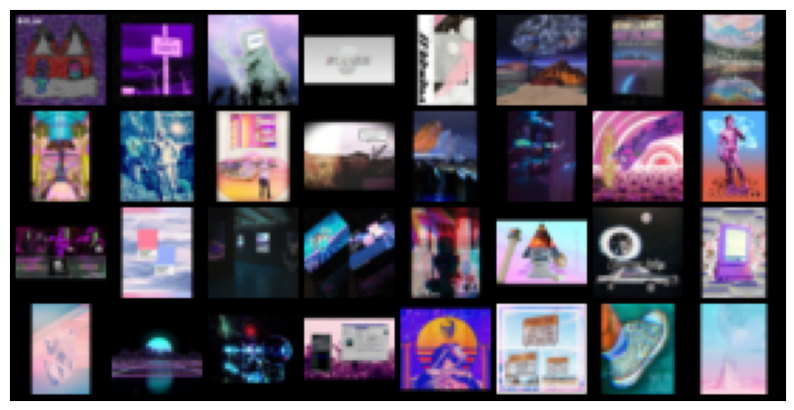

In [6]:
def show_images(images, nmax=32):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid((images.detach()[:nmax]), nrow=8).permute(1, 2, 0))
    
def show_batch(dl, nmax=32):
    for images in dl:
        show_images(images, nmax)
        break
        
show_batch(train_dl)